## 인공지능과 머신러닝 수학적 기초

In [8]:
pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 7.2 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 7.1 MB/s eta 0:00:0000:0100:01m

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [21]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

def house_price_prediction():
    np.random.seed(42)
    
    house_sizes = np.random.normal(100,30,1000)
    print(house_sizes)
    house_prices = house_sizes * 50 + np.random.normal(0,500,1000) + 2000
    print(house_prices)   
    
    x = house_sizes.reshape(-1,1)
    
    y = house_prices
    
    x_train, x_test, y_train, y_test = train_test_split(
        x,y, test_size = 0.2, random_state = 42
    )
    
    model = LinearRegression()
    
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    mse = mean_squared_error(y_test, y_pred)
    
    r2 = r2_score(y_test, y_pred)
    
    print(f"평균 제곱 오차:{mse:.2f}")
    print(f"결정 계수: {r2:.2f}")
    print(f"모델 계수: {model.coef_[0]:.2f}")
    print(f"모델 절편: {model.intercept_:.2f}")
    
    new_house_sizes = [80,120,150]
    for size in new_house_sizes:
        predicted_price = model.predict([[size]])[0]
    
        print(f"{size}평 집의 예상 가격 : {predicted_price: .2f}만원")
    
    return model, x_test, y_test, y_pred
    

In [22]:
model, x_test, y_test, y_pred = house_price_prediction()

[114.90142459  95.85207096 119.43065614 145.69089569  92.97539876
  92.97589129 147.37638447 123.02304187  85.91576842 116.27680131
  86.09746922  86.02810739 107.25886815  42.60159266  48.25246502
  83.13137412  69.61506639 109.42741998  72.75927773  57.63088896
 143.96946307  93.22671099 102.02584614  57.25755441  83.66851826
 103.32767769  65.47019268 111.27094055  81.9808393   91.24918751
  81.94880163 155.56834554  99.59508326  68.26867213 124.67634736
  63.3746905  106.26590785  41.20989628  60.15441853 105.90583708
 122.1539974  105.14104844  96.53055153  90.96688913  55.64434029
  78.40467375  86.18083687 131.71366679 110.30854869  47.10879534
 109.72251908  88.44753159  79.69233999 118.35028867 130.92998567
 127.93840357  74.8234743   90.72362872 109.93790294 129.26635381
  85.62477286  94.4302307   66.80995078  64.11380128 124.37577467
 140.68720086  97.83969635 130.10598694 110.84908075  80.64640736
 110.84186817 146.14109699  98.92521883 146.93930967  21.40764688
 124.65707

## 컴퓨터비전 데이터 처리

### 이미지 데이터 처리

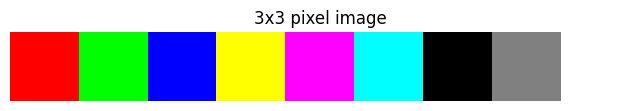

In [23]:
# 이미지 데이터 기초

import numpy as np
import matplotlib.pyplot as plt

simple_img = np.array([
    [[255,0,0],[0,255,0],[0,0,255],
     [255,255,0],[255,0,255],[0,255,255],
     [0,0,0],[128,128,128],[255,255,255]
     ]
])

plt.figure(figsize = (8,4))
plt.imshow(simple_img)
plt.title("3x3 pixel image")
plt.axis('off')

plt.show()

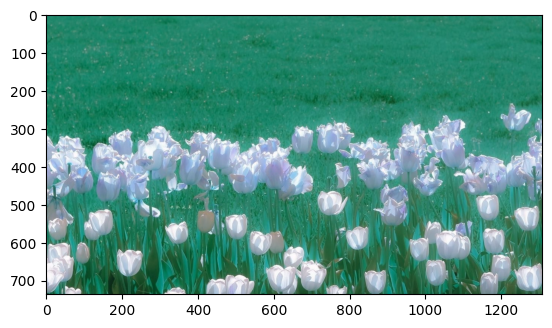

In [22]:
import cv2

sample_img = cv2.imread('image.jpg')
plt.imshow(sample_img)
plt.show()

In [18]:
# 채널 분리
blue_channel = sample_img[:,:,0] # blue색상 채널
# 첫번째 차원은 행, 두번째 차원은 열, 세번째 차원은 채널
green_channel = sample_img[:,:,1]
red_channel = sample_img[:,:,2]


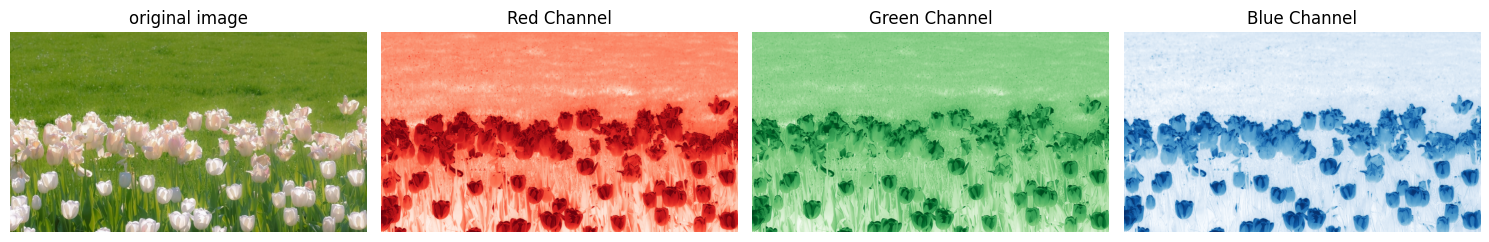

In [27]:
# 각 채널별 시각화
plt.figure(figsize =(15,3))

plt.subplot(1,4,1)
plt.imshow(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))
plt.title('original image')
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(red_channel, cmap = 'Reds')
plt.title('Red Channel')
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(green_channel, cmap = 'Greens')
plt.title('Green Channel')
plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(blue_channel, cmap = 'Blues')
plt.title('Blue Channel')
plt.axis('off')

plt.tight_layout()
plt.show()

400x400:480,000 bytes (468.8KB)
200x200:120,000 bytes (117.2KB)
100x100:30,000 bytes (29.3KB)
50x50:7,500 bytes (7.3KB)


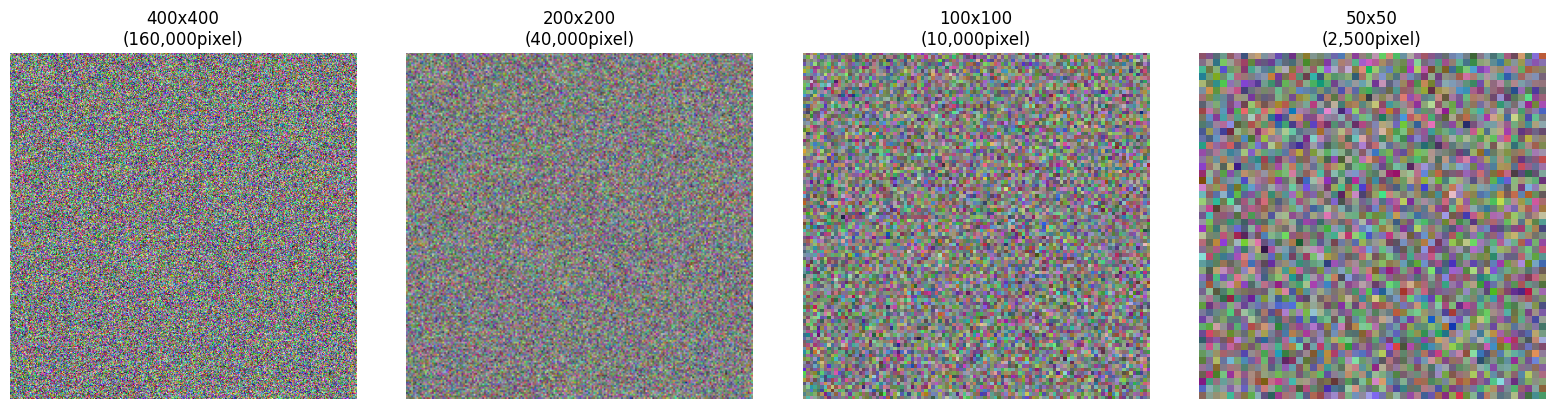

In [49]:
# 해상도 예제
original_size = (400,400,3)
original_img = np.random.randint(0,256,original_size, dtype = np.uint8)

resolutions = [(400,400),(200,200),(100,100),(50,50)]

plt.figure(figsize = (16,4))
for i, (w, h) in enumerate(resolutions):
    resized_img = cv2.resize(original_img, (w,h))
    plt.subplot(1,4, i+1)
    plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
    plt.title(f'{w}x{h}\n({w*h:,}pixel)')
    plt.axis('off')
    
    file_size = resized_img.nbytes
    print(f'{w}x{h}:{file_size:,} bytes ({file_size/1024:.1f}KB)')
    
plt.tight_layout()
plt.show()

In [51]:
# 해상도와 품질의 관계 분석
def anal_resolution_q(img, target_size):
    resized = cv2.resize(img, target_size)
    restored = cv2.resize(resized, (img.shape[1], img.shape[0]))
    
    mse = np.mean((img.astype(float) - restored.astype(float)) ** 2)

    return resized, restored, mse

test_img = np.random.randint(0,256,(200,200,3), dtype = np.uint8)
sizes = [(100,100),(50,50),(25,25)]

# 품질 손실 분석
for size in sizes:
    _, restored, mse = anal_resolution_q(test_img, size)
    print(f"Resolution {size}: MSE = {mse:.2f}")

Resolution (100, 100): MSE = 4476.18
Resolution (50, 50): MSE = 5573.84
Resolution (25, 25): MSE = 5961.83


### OpenCV

OpenCV 버전 : 4.12.0


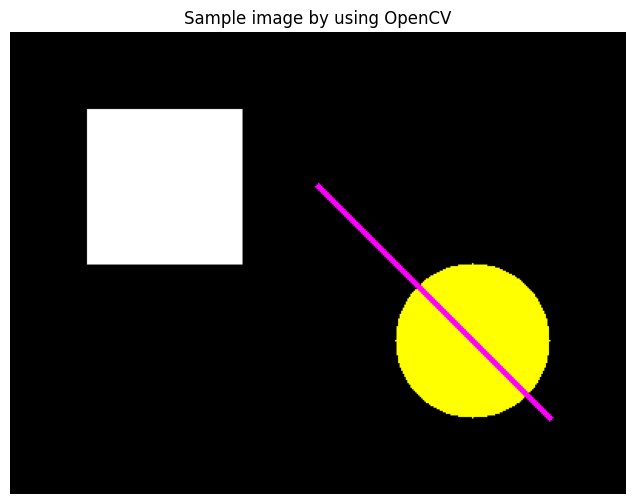

In [58]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

print(f"OpenCV 버전 : {cv2.__version__}")

def create_sample_img():
    h,w = 300,400
    img = np.zeros((h,w,3), dtype = np.uint8)
    
    cv2.rectangle(img, (50,50),(150,150),(255,255,255),-1)
    cv2.circle(img,(300,200), 50, (0,255,255),-1)
    cv2.line(img,(200,100),(350,250),(255,0,255),3)
    
    return img

sample = create_sample_img()
plt.figure(figsize = (8,6))
plt.imshow(cv2.cvtColor(sample, cv2.COLOR_BGR2RGB))
plt.title("Sample image by using OpenCV")
plt.axis('off')
plt.show()

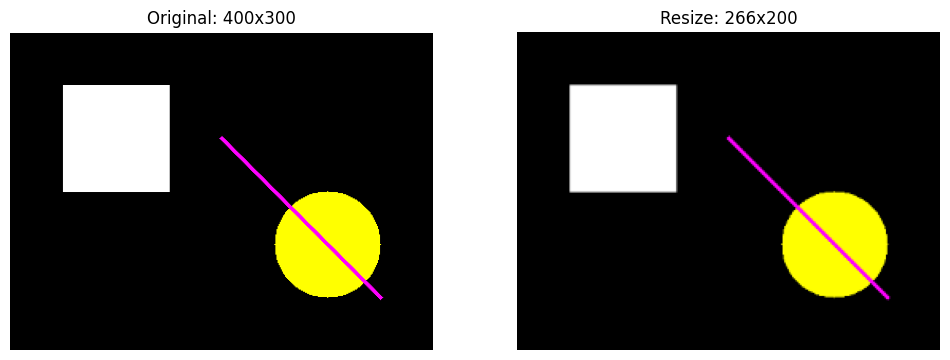

In [70]:
# 이미지 사이즈 조정
def resize_methods():
    
    original = create_sample_img()
    print(f"Original size: {original.shape}")
    
    interpolations = {
        "NEAREST": cv2.INTER_NEAREST,
        "LINEAR": cv2.INTER_LINEAR,
        "CUBIC": cv2.INTER_CUBIC,
        "LANCZOS": cv.INTER_LANCZOS4
    }
    
    target_size = (200, 150)
    
    plt.subplot(2,3,1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title(f"Original\n {original.shape[1]}x{original.shape[0]}")
    plt.axis('off')
    
    for i, (name, method) in enumerate(interpolations.items()):
        resized = cv2.resize(original, target_size, interpolation = method)
        
        plt.subplot(2,3,i+2)
        plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))
        plt.title(f"{name}\n{target_size[0]}x{target_size[1]}")
        plt.axis('off')
        
    plt.tight_layout()
    plt.show()   
    
    return resized

def resize_keep_ratio(image, max_size = 300):
    h,w = image.shape[:2]
    
    if max(h,w) > max_size:
        if h > w:
            new_h = max_size
            new_w = int(w * max_size / h)
            
        else:
            new_h = max_size
            new_w = int(w * max_size / h)
    
    else:
        new_h, new_w = h,w
        
    resized = cv2.resize(image, (new_w, new_h))
    return resized
    
    # 실습
original = create_sample_img()

resized_ratio = resize_keep_ratio(original, 200)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
plt.title(f'Original: {original.shape[1]}x{original.shape[0]}')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(resized_ratio, cv2.COLOR_BGR2RGB))
plt.title(f'Resize: {resized_ratio.shape[1]}x{resized_ratio.shape[0]}')
plt.axis('off')
plt.show()
